## **LABWORK 1 - Naive Bayes Classification using Dummy Data**

### **Multinomial Naive Bayes Model**

**Step 1 - Creating Dummy Data**

In [1]:
import numpy as np
from sklearn.datasets import make_classification

# Create dummy data
X,y = make_classification(n_samples=30, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_repeated=0, shuffle=False)

# By default, make_classification function produce features in floating point
# In this case, we want to make it as integer value

# Convert to absolute point
X = np.absolute(X)

# Round to 2 decimal place
X = np.round(X, 2) * 100

# Convert to interger
X = X.astype(int)
print(X)
print(y)

[[258   2]
 [220 168]
 [374 159]
 [ 34 181]
 [104 100]
 [162  96]
 [136 121]
 [231 242]
 [ 98  72]
 [  3 103]
 [ 10  14]
 [124  12]
 [ 76  72]
 [  1  30]
 [ 85  35]
 [ 36 114]
 [111  81]
 [ 25  37]
 [ 85  67]
 [ 96  74]
 [141 124]
 [218 216]
 [ 19   6]
 [144  98]
 [176 108]
 [183 160]
 [297 132]
 [112 145]
 [224 121]
 [170  48]]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1]


**(Optional)** Creating DataFrame
To make the data easier to read, we will create a DataFrame using the Pandas library based on the dummy data generated earlier.

In [37]:
import pandas as pd

# We need to reshape the label 'y' to 2d array
y_new = y.reshape(len(y), 1)

# Concatenate features and labels
data = np.concatenate((X, y_new), axis=1)

# Create a list of columns name
column_name = ['Feature 1', 'Feature 2', 'Label']

# Create Pandas DataFrame
df = pd.DataFrame(data, columns=column_name)

# Check DataFrame
df.head()

,Feature 1,Feature 2,Label
0,55,73,0
1,35,66,0
2,187,150,0
3,112,108,0
4,64,78,0


**Step 2 - Convert Label to Categorical Value**

In [38]:
# Define categorical label
labels = {
    1 : 'Kelas A',
    0 : 'Kelas B'
}

# Duplicate DataFrame
df_label = df.copy()

# Map new label to encoded label
df_label['Label'] = df_label['Label'].map(labels)

# Check
df_label.head()

,Feature 1,Feature 2,Label
0,55,73,Kelas B
1,35,66,Kelas B
2,187,150,Kelas B
3,112,108,Kelas B
4,64,78,Kelas B


**(Optional)** Visualize The Data

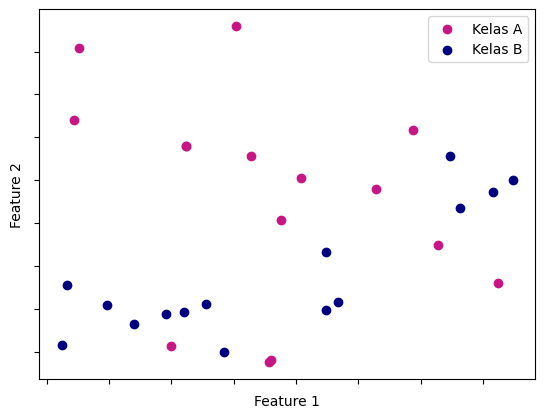

In [39]:
import matplotlib.pyplot as plt
colors = {
    'class_a': 'MediumVioletRed',
    'class_b': 'Navy'
}

gb = df_label.groupby(['Label'])
class_a = gb.get_group('Kelas A')
class_b = gb.get_group('Kelas B')
plt.scatter(x=class_a['Feature 1'], y=class_a['Feature 2'], c=colors['class_a'])
plt.scatter(x=class_b['Feature 1'], y=class_b['Feature 2'], c=colors['class_b'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(['Kelas A', 'Kelas B'])
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

**Step 3 - Create Multinomial Naive Bayes Model**

In [40]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

# Initiate the MultinomialNB object
mnb = MultinomialNB()

# We can use X and y from data dummy directly

# Split data into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30)

# Fitting model
# Label y should be in 1D arraylike form
mnb.fit(X_train, y_train)

# Make a prediction from train data
y_train_pred = mnb.predict(X_train)

# Make a prediction from test data
y_test_pred = mnb.predict(X_test)

**Step 4 - Model Evaluation**

In [42]:
from sklearn.metrics import accuracy_score

# training accuracy
acc_train = accuracy_score(y_train, y_train_pred)

# testing accuracy
acc_test = accuracy_score(y_test, y_test_pred)

# Model evaluation on accuracy
print(f'Train data accuracy results: {acc_train}')
print(f'Test data accuracy results: {acc_test}')

Train data accuracy results: 0.6190476190476191
Test data accuracy results: 0.4444444444444444


**Gaussian Naive Bayes Model**

In [43]:
from sklearn.naive_bayes import GaussianNB

# Initiati GaussianNB object
gnb = GaussianNB()

# We will use the training and testing data from previous model

# Fit model
gnb.fit(X_train, y_train)

# Make a prediction using training data
y_train_pred_gnb = gnb.predict(X_train)

# Evaluate training data accuracy
acc_train_gnb = accuracy_score(y_train, y_train_pred_gnb)

# Make a prediction using testing data
y_test_pred_gnb = gnb.predict(X_test)

# Evaluate testing data accuracy
acc_test_gnb = accuracy_score(y_test, y_test_pred_gnb)

# Print model evaluation
print(f'Train Accuracy (Gaussian): {acc_train_gnb}')
print(f'Test Accuracy (Gaussian): {acc_test_gnb}')

Train Accuracy (Gaussian): 0.8095238095238095
Test Accuracy (Gaussian): 0.5555555555555556
